In [ ]:
!pip install numpy
!pip install --user matplotlib
!pip install --user scikit-learn

print(__doc__)

In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp



def data_production(class_number,Nd) :
    import numpy as np
    import random
    from matplotlib import pyplot as plt
    
    r1 = [[40,60],[30,70],[20,80]] #input number is 3
    r2 = [[40,60],[34,66],[26,74],[20,80]] #input number is 4 [26,74], [27,73]
    r3 = [[40,60],[35,65],[30,70],[25,75],[20,80]] #input number is 5
    
    r = [r1,r2,r3]
    r = r[class_number]
    group = len(r) 
    w = []; l = [];
    for i in range(0,group):
        for j in range(0,Nd):
            intra = np.zeros((100,100))
            while np.sum(intra.reshape(1,10000)) < random.randrange(25,101) :            
                intra[random.randrange(r[i][0],r[i][1]),random.randrange(r[i][0],r[i][1])] = 1
            w.append(intra); l.append(i)
    w = np.array(w)
    X = w.reshape(Nd*group,-1); y = np.array(l)
  
    return X, y

def plot_ROC(class_number,Nd,Np):
    c = [[0,1,2],[0,1,2,3],[0,1,2,3,4]]
    classes = c[class_number]
    n_classes = len(classes)
    X,y = data_production(class_number,Nd*2)
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)
    y_one_train = label_binarize(y_train, classes=classes);y_one_test = label_binarize(y_test, classes=classes)
#pca dimension reduction
    pca = PCA(n_components=Np,svd_solver='auto', whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train);  X_test_pca = pca.transform(X_test)
#train RF classifier
    clf = RandomForestClassifier(n_estimators=200,max_depth=30).fit(X_train_pca,y_train)
#calculate probability of each class
    y_score = clf.predict_proba(X_test_pca)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_one_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])       
    fpr["micro"], tpr["micro"], _ = roc_curve(y_one_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  
    lw = [2,1.75,1.5,1.25,1]
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    plt.figure(figsize=(5,5))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], lw=lw[i],label='ROC curve of class {0} (area = {1:0.3f})'''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")     


# Fig. 9a

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


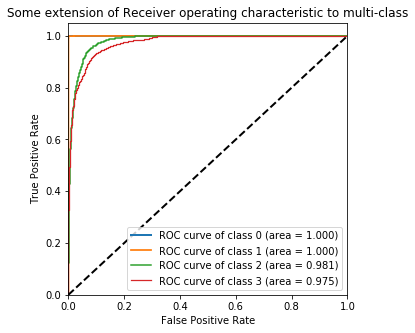

In [4]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 1
#Np and Nd are the number of principal components and data, respectively
Np           = 600
Nd           = 1500

plot_ROC(class_number,Nd,Np)
plt.savefig('Fig9_a_1.eps',dpi = 500, Transparent=False)
plt.savefig('Fig9_a_1.png',dpi = 500, Transparent=False)

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


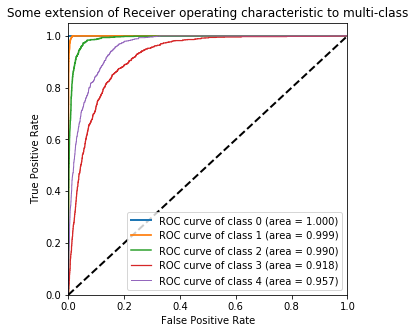

In [5]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 2
#Np and Nd are the number of principal components and data, respectively
Np           = 600
Nd           = 1200

plot_ROC(class_number,Nd,Np)
plt.savefig('Fig9_a_2.eps',dpi = 500, Transparent=False)
plt.savefig('Fig9_a_2.png',dpi = 500, Transparent=False)

# Fig. 9b

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


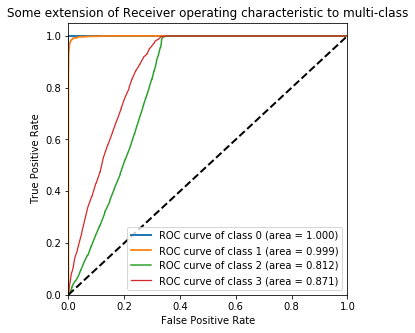

In [8]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 1
#Np and Nd are the number of principal components and data, respectively
Np           = 3600
Nd           = 1500

plot_ROC(class_number,Nd,Np)
plt.savefig('Fig9_c_1.eps',dpi = 500, Transparent=False)
plt.savefig('Fig9_c_1.png',dpi = 500, Transparent=False)

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


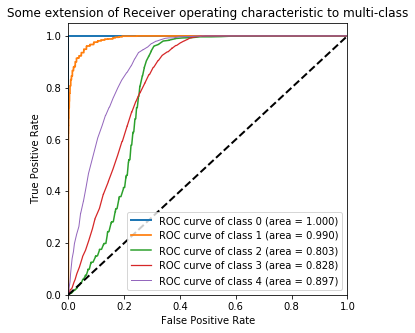

In [9]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 2
#Np and Nd are the number of principal components and data, respectively
Np           = 3600
Nd           = 1200

plot_ROC(class_number,Nd,Np)
plt.savefig('Fig9_c_2.eps',dpi = 500, Transparent=False)
plt.savefig('Fig9_c_2.png',dpi = 500, Transparent=False)